# Data Science Group Project
### Group 51
Thuseevan Nareshkumar 46328785
### Name and Student number 
add you name here then remove this 

# Executive Summary
work on it

# Introduction
work on it

# Project Goal
# work on it make it dot points 
One key objective we would like to explore with our chosen dataframe is to take
advantage of the various sources to reach an optimal conclusion that will help with
either decision making/support.
We are eager to provide an analysis that will enable us to correlate trends/patterns with
real world activities. From this, we aim to provide a sustainable solution that in hope
answers the distinction between an array of transportation rush hours, off-peak hours
and outliers. We will also aim to challenge ourselves


# Data source

The dataset is from the Bureau of Transport Statistics. This dataset contains NSW trains official train utilisation figures for Intercity train lines only. These figures include the data of passengers who on/tap off well as passeners who bought tickets when entering and exiting the transportation service stations. It is set out as a line and aggregated into a monthly figure for a passenger for their estimated times of travel during that month. 
The data was collected from opal train trips by month,line and card type, from July 2016 to August 2021. The format of the data set is in CSV. Here is a link to the relevant document page: https://opendata.transport.nsw.gov.au/dataset/opal-trips-train.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import seaborn as sns

In [24]:
#We tried importing the file, but this method didn’t work for some reason.
#pd.show_versions()
#data = pd.read_csv("files/TrainCardType.csv")
# we had error opeing the file

In [25]:
#We realised that there was an error with encoding the file. After resolving the the issue, we were able to import the file.
# importing the file
data = pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")

In [26]:
#show data head
data.head(2)

,Route,Travel type,1/07/2016+C1:BA1,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
0,"T1 North Shore, Northern and Western Line",Adult,"8,575,135","9,484,134","8,956,112","8,778,524","9,221,978","8,036,202","7,774,754","8,446,672",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"T1 North Shore, Northern and Western Line",Child/Youth,"432,083","370,300","425,154","438,430","404,288","505,401","552,039","394,228",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# renaming 
data = data.rename(columns={"1/07/2016+C1:BA1": "Jul-16"})
#data.head()

In [28]:
#checking the data set size 
print("The size of the data is : ", data.shape) 
print("The number of row {} and number of columns {} ".format(data.shape[0], data.shape[1]))

The size of the data is :  (248, 65)
The number of row 248 and number of columns 65 


In [29]:
# checking data type 
print(type(data))
print(type(data['Jul-16']))
print(type(data['Jul-16'][0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>


In [30]:
#show infor for data
#data.info()

Note: The data set have too many null value. Dropping the null value drop almost 70% of the data. We tried dropping the value but too many rows and coulmns were droped

In [31]:
# Deal with the NaN values in the data
data.isna().sum()

Route            0
Travel type      0
Jul-16         139
Aug-16         139
Sep-16         139
              ... 
May-21          69
Jun-21          69
Jul-21          75
Aug-21          73
Sep-21          73
Length: 65, dtype: int64

In [32]:
#The data set have too many null value. Dropping the null value drop almost 70% of the data.
#We tried dropping the value but too many rows and coulmns were droped
#data =data.dropna()
#data.shape
#data.head(2)

In [33]:
data_l =data

In [34]:
#we decide to assign 0 to null values
data.fillna( '0', inplace = True)
#data.head(2)

In [35]:
data.head(2)

,Route,Travel type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
0,"T1 North Shore, Northern and Western Line",Adult,"8,575,135","9,484,134","8,956,112","8,778,524","9,221,978","8,036,202","7,774,754","8,446,672",...,0,0,0,0,0,0,0,0,0,0
1,"T1 North Shore, Northern and Western Line",Child/Youth,"432,083","370,300","425,154","438,430","404,288","505,401","552,039","394,228",...,0,0,0,0,0,0,0,0,0,0


# Functions to remove ',' 

In [36]:
data = data.replace(',','', regex=True)

In [37]:
for x in data.columns[2:]:
    data[x] = pd.to_numeric(data[x])

In [38]:
print(type(data['Jul-16'][0]))

<class 'numpy.int64'>


In [39]:
# read the train data file and extract all name of the Route
route=pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")["Route"]
route.unique()

array(['T1 North Shore, Northern and Western Line',
       'T2 Airport, Inner West and South Line', 'T3 Bankstown Line',
       'T4 Eastern Suburbs and Illawarra Line', 'T5 Cumberland Line',
       'T6 Carlingford Line', 'T7 Olympic Park Line',
       'Blue Mountains Line', 'Central Coast Newcastle Line',
       'Hunter Line', 'South Coast Line', 'Southern Highlands Line',
       'Station Link', 'T1 North Shore Line', 'T1 Northern Line',
       'T1 Western Line', 'T2 Inner West Line', 'T2 Leppington Line',
       'T6 replacement buses', 'T8 Airport and South Line',
       'T9 Northern Line', 'Grand Total'], dtype=object)

In [40]:
# read the train data file and extract all name of the Route
df=pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")["Travel_type"]
df.unique()

KeyError: 'Travel_type'

In [41]:
# drop the last raw Grand Total
data_c =data.drop(247)
data_c.tail(2)

,Route,Travel type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
245,T9 Northern Line,Sgl Trip Rail Adult,0,0,0,0,0,0,0,0,...,1331,836,1189,1295,2172,1663,927,187,130,162
246,T9 Northern Line,Sgl Trip Rail Child/Youth,0,0,0,0,0,0,0,0,...,957,941,726,783,1897,1020,634,169,80,104


In [42]:
data_c.Route.value_counts()

Hunter Line                                 12
T7 Olympic Park Line                        12
T2 Inner West Line                          12
T6 Carlingford Line                         12
T4 Eastern Suburbs and Illawarra Line       12
T1 Northern Line                            12
T1 North Shore Line                         12
Blue Mountains Line                         12
T3 Bankstown Line                           12
South Coast Line                            12
Central Coast Newcastle Line                12
T2 Leppington Line                          12
T5 Cumberland Line                          12
T1 Western Line                             12
T8 Airport and South Line                   12
Southern Highlands Line                     12
T9 Northern Line                            12
T1 North Shore Northern and Western Line    11
T2 Airport Inner West and South Line        11
Station Link                                11
T6 replacement buses                        10
Name: Route, 

There are 21 differnt train routes 

In [43]:
data_c.describe()

,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
count,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,...,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,247.000000,247.000000,247.000000
mean,1.166771e+05,1.311497e+05,1.240824e+05,1.218900e+05,1.267947e+05,1.141279e+05,1.082406e+05,1.164657e+05,1.399449e+05,1.163795e+05,...,6.548096e+04,5.512768e+04,7.192491e+04,8.471985e+04,8.320850e+04,8.517655e+04,6.960921e+04,21331.307692,17189.834008,18485.323887
std,7.011211e+05,7.684896e+05,7.304312e+05,7.160032e+05,7.536720e+05,6.735766e+05,6.489393e+05,6.932163e+05,8.139497e+05,6.747326e+05,...,2.018115e+05,1.743364e+05,2.124248e+05,2.476054e+05,2.411020e+05,2.487978e+05,2.058082e+05,73654.659210,59846.955262,63180.665555
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.253000e+03,9.370000e+02,1.335000e+03,1.546000e+03,1.897000e+03,1.663000e+03,1.265000e+03,223.000000,178.000000,144.000000
75%,7.531000e+03,1.001850e+04,9.155500e+03,1.013950e+04,8.962000e+03,7.860500e+03,6.165500e+03,7.850000e+03,1.113300e+04,1.110300e+04,...,3.229750e+04,1.650900e+04,3.790550e+04,4.217350e+04,4.068900e+04,4.268650e+04,3.140250e+04,4597.500000,3145.000000,3583.000000
max,8.575135e+06,9.484134e+06,8.956112e+06,8.778524e+06,9.221978e+06,8.036202e+06,7.774754e+06,8.446672e+06,9.994667e+06,8.111738e+06,...,1.671861e+06,1.538773e+06,1.713603e+06,1.982189e+06,1.856641e+06,1.937118e+06,1.596551e+06,631262.000000,530477.000000,534231.000000


Note: The data set we have for 2016 is from july  to december 2016 and for 2019 is from januray  to september 2021

## 'You define a baseline performance with a simple model'

The following code below, split the data set by years 

In [44]:
data_2016 = []
data_2017 = []
data_2018 = []
data_2019 =[]
data_2020=[]
data_2021=[]
for i in range(2,8):
    data_2016.append(data_c.columns[i])
for i in range(8,20):
    data_2017.append(data_c.columns[i])
for i in range(20,32):
    data_2018.append(data_c.columns[i])
for i in range(32,44):
    data_2019.append(data_c.columns[i])
for i in range(44,56):
    data_2020.append(data_c.columns[i])
for i in range(56,65):
    data_2021.append(data_c.columns[i])

In [45]:
data_2018

['Jan-18',
 'Feb-18',
 'Mar-18',
 'Apr-18',
 'May-18',
 'Jun-18',
 'Jul-18',
 'Aug-18',
 'Sep-18',
 'Oct-18',
 'Nov-18',
 'Dec-18']

In [46]:
data_16 = data_c[data_2016]
data_17 = data_c[data_2017]
data_18 = data_c[data_2018]
data_19 = data_c[data_2019]
data_20 = data_c[data_2020]
data_21 = data_c[data_2021]

In [47]:
data_c.sum()

Route          T1 North Shore Northern and Western LineT1 Nor...
Travel type    AdultChild/YouthConcessionDay Pass Child/Youth...
Jul-16                                                  28819249
Aug-16                                                  32393980
Sep-16                                                  30648352
                                     ...                        
May-21                                                  21038609
Jun-21                                                  17193476
Jul-21                                                   5268833
Aug-21                                                   4245889
Sep-21                                                   4565875
Length: 65, dtype: object

In [48]:
total16 = (data_16.sum()).sum()
total17 = (data_17.sum()).sum()
total18 = (data_18.sum()).sum()
total19 = (data_19.sum()).sum()
total20 = (data_20.sum()).sum()
total21 = (data_21.sum()).sum()

In [49]:
total16.sum()


181476277

In [50]:
data_16.sum()

Jul-16    28819249
Aug-16    32393980
Sep-16    30648352
Oct-16    30106833
Nov-16    31318279
Dec-16    28189584
dtype: int64

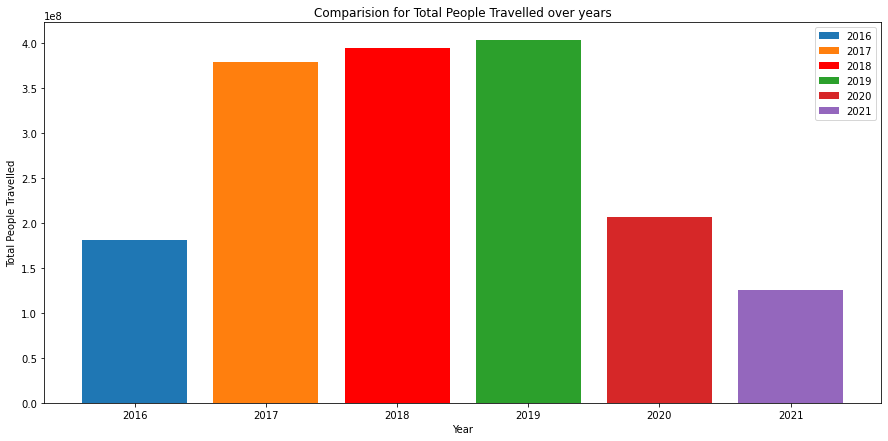

In [51]:
labels = ['2016', '2017','2018','2019','2020','2021']
plt.figure(figsize=(15,7))
plt.bar("2016", total16, align = 'center', label = '2016') 
plt.bar( "2017", total17,  align = 'center', label = '2017') 
plt.bar("2018", total18, color = 'red' ,align = 'center', label = '2018') 
plt.bar( "2019", total19,  align = 'center', label = '2019') 
plt.bar( "2020", total20, align = 'center', label = '2020') 
plt.bar( "2021", total21,  align = 'center', label = '2021') 
plt.title('Comparision for Total People Travelled over years') 
plt.ylabel('Total People Travelled') 
plt.xlabel('Year') 
plt.legend()
plt.show()

# Need to modify. add more info
We can that 2017 to 2019 number of people travelling incresed but in 2020 it has declined alot, we belive this might be caused becase of covid 19. we can't make any assumtion for 2016 and 2021 because we dont have the full data set 

## 2016 July to December

Text(0, 0.5, 'Number of People Travavelled(M)')

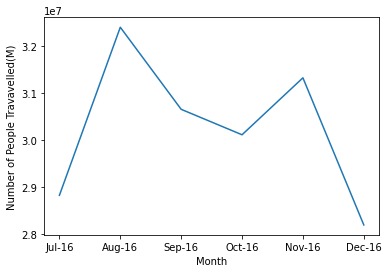

In [52]:
data_16.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

# more info

## 2017 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

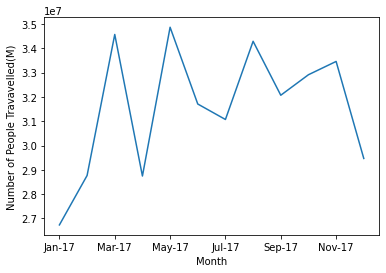

In [53]:
data_17.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

# more info

## 2018 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

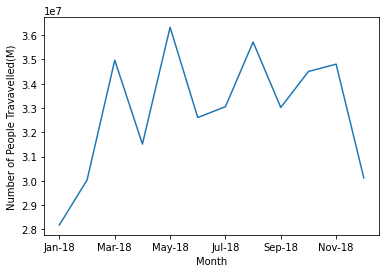

In [54]:
data_18.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

# more info

## 2019 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

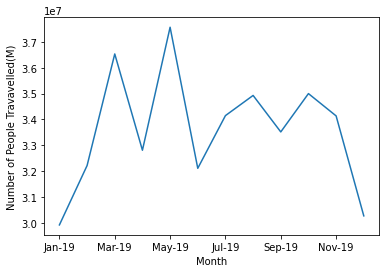

In [55]:
data_19.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

# more info

## 2020 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

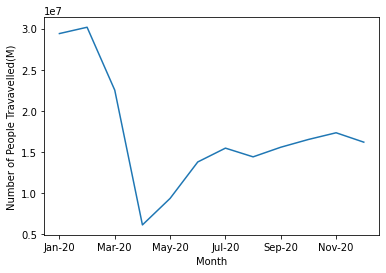

In [56]:
data_20.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

# more info

## 2021 Jan to Sep

Text(0, 0.5, 'Number of People Travavelled(M)')

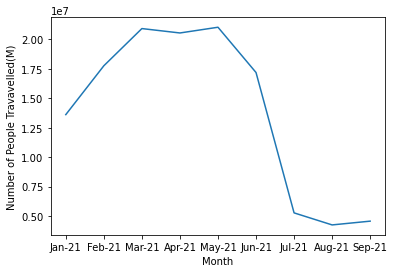

In [57]:
data_21.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

# more info

In [58]:
#Total People Travel Over Years 

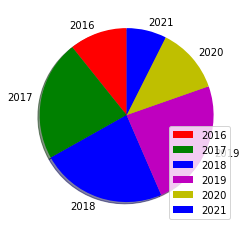

In [59]:
total = [total16,total17,total18,total19,total20,total21]
years = ['2016','2017','2018','2019','2020','2021']
color = ['r','g','b','m','y', 'b']
plt.pie(total, labels = years, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

In [60]:
#Total People Travel Over Months 

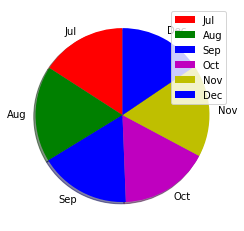

In [61]:
#2016
sum = data_16.sum()
months = ['Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

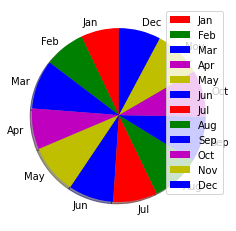

In [62]:
#2017
sum = data_17.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

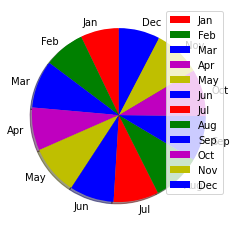

In [63]:
#2018
sum = data_18.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

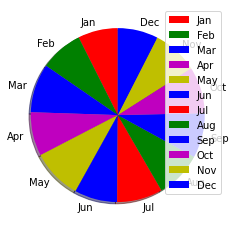

In [64]:
#2019
sum = data_19.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

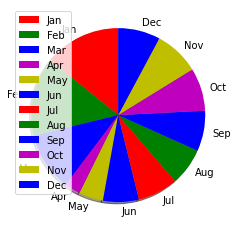

In [65]:
#2020
sum = data_20.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

In [66]:
data_21.sum()

Jan-21    13616536
Feb-21    17765453
Mar-21    20925803
Apr-21    20552499
May-21    21038609
Jun-21    17193476
Jul-21     5268833
Aug-21     4245889
Sep-21     4565875
dtype: int64

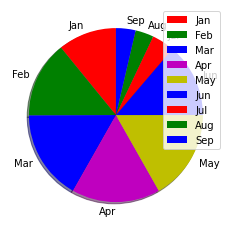

In [67]:
#2021
sum = data_21.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [130]:
lst = [['2016', total16],['2017', total17],['2018', total18],['2019', total19],['2020', total20],['2021', total21],]
df = pd.DataFrame(lst, columns = ['Year', 'Usage'])
df

,Year,Usage
0,2016,181476277
1,2017,378643158
2,2018,394847825
3,2019,403164448
4,2020,206638633
5,2021,125172973


In [131]:
train, test = train_test_split(df, test_size = 0.2, random_state=142)
print(train.shape)
print(test.shape)

(4, 2)
(2, 2)


In [132]:
x_train = train[['Year']]
y_train = train['Usage']

x_test = test[['Year']]
y_test = test['Usage']

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4, 1)
(4,)
(2, 1)
(2,)


In [133]:
lr = linear_model.LinearRegression()


In [134]:
lr.fit(x_train, y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(x_test)


In [136]:
y_pred

array([2.41605119e+08, 2.35359101e+08])

In [137]:
mse_lr = mean_squared_error(y_test, y_pred)


In [138]:
mse_lr

2.210803868218854e+16

In [139]:
plt.scatter(x,y, color='blue')
plt.plot([0,2025],[b,m*100+b],'r')
plt.title('Ticket use over time', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Usage', fontsize = 15)
plt.show()

NameError: name 'y' is not defined

In [140]:
pred_y_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
1,378643158,2.416051e+08,1.370380e+08
2,394847825,2.353591e+08,1.594887e+08


In [141]:
###I think 3 is done? Regression is hella sus above^ will need 2 fix later 

# Model

In [142]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [143]:
data_l =data_c

In [144]:
set(data_l['Aug-21'])

{0,
 1,
 2,
 4,
 6,
 8,
 10,
 12,
 13,
 14,
 15,
 16,
 26,
 28,
 29,
 35,
 39,
 43,
 44,
 55,
 57,
 59,
 64,
 75,
 76,
 80,
 83,
 89,
 91,
 95,
 100,
 105,
 115,
 130,
 132,
 138,
 145,
 148,
 153,
 159,
 166,
 178,
 184,
 185,
 187,
 196,
 202,
 235,
 245,
 273,
 280,
 287,
 318,
 345,
 378,
 389,
 437,
 473,
 493,
 499,
 503,
 530,
 543,
 577,
 590,
 593,
 600,
 631,
 699,
 752,
 805,
 861,
 905,
 1010,
 1054,
 1058,
 1096,
 1099,
 1129,
 1136,
 1169,
 1190,
 1315,
 1380,
 1435,
 1439,
 1462,
 1525,
 1561,
 1687,
 1745,
 1814,
 2016,
 2023,
 2032,
 2179,
 2292,
 2388,
 2584,
 2859,
 2886,
 2908,
 2980,
 3310,
 3401,
 3801,
 3905,
 3919,
 4640,
 4889,
 4985,
 5664,
 5884,
 6179,
 6379,
 8183,
 8662,
 8781,
 8798,
 9501,
 10211,
 10687,
 10911,
 11544,
 11707,
 12325,
 12893,
 13460,
 14923,
 15319,
 17699,
 18860,
 19470,
 20934,
 21986,
 22091,
 23371,
 27327,
 32939,
 35077,
 41827,
 45223,
 46862,
 51589,
 51628,
 58138,
 58425,
 61334,
 62668,
 64364,
 83095,
 85163,
 91711,
 9423

In [145]:
# changeing strings to intiger value 
def get_categorical_col(df):
    s = (data_l.dtypes == 'object')
    cols = list(s[s].index)
    return cols
print("categorical columns in data:",get_categorical_col(data_l))

categorical columns in data: ['Travel type']


In [146]:
# calling the function GET 
def enc(data_l):
    lab_enc=LabelEncoder()
    #onehot_enc=OneHotEncoder(drop='first', sparse=False)
    data_l['Route'] = lab_enc.fit_transform(data_l['Route'])
    data_l['Travel_type'] = lab_enc.fit_transform(data_l['Travel_type'])

enc(data_l)

KeyError: 'Travel_type'

In [147]:
data_l

,Route,Travel type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
0,7,Adult,8575135,9484134,8956112,8778524,9221978,8036202,7774754,8446672,...,0,0,0,0,0,0,0,0,0,0
1,7,Child/Youth,432083,370300,425154,438430,404288,505401,552039,394228,...,0,0,0,0,0,0,0,0,0,0
2,7,Concession,790206,1081373,855554,839434,677907,524749,488489,607040,...,0,0,0,0,0,0,0,0,0,0
3,7,Day Pass Child/Youth w/o SAF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,Day Pass without SAF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,20,Free Travel,0,0,0,0,0,0,0,0,...,709,527,767,778,977,905,713,146,91,129
243,20,School Student,0,0,0,0,0,0,0,0,...,32803,4464,76522,88883,40886,85542,60247,218,280,218
244,20,Senior/Pensioner,0,0,0,0,0,0,0,0,...,109387,86556,116405,134217,149381,155281,112473,28833,22091,24927
245,20,Sgl Trip Rail Adult,0,0,0,0,0,0,0,0,...,1331,836,1189,1295,2172,1663,927,187,130,162


In [148]:
# Split your data into training(80%) and testing data (20%) and use random_state=42
train, test = train_test_split(data_l, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(197, 65)
(50, 65)


In [149]:
# Logistic Regression model
# Getting input data and targets for building prediction model
X_train =train.drop(['Aug-21'],axis=1)
y_train = train['Aug-21']
X_test =test.drop(['Aug-21'],axis=1)
y_test=test['Aug-21']

print(X_train.shape,"train x")
print(y_train.shape,"train y")
print(X_test.shape, "test x")
print(y_test.shape, "test y")
X_train.head()

(197, 64) train x
(197,) train y
(50, 64) test x
(50,) test y


,Route,Travel type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Sep-21
154,6,Child/Youth,0,0,0,0,0,0,0,0,...,81995,103142,108736,96922,85477,140999,91420,65984,8051,10075
211,12,Sgl Trip Rail Adult,0,0,0,0,0,0,0,0,...,3402,3956,2653,3370,4680,6097,3980,3651,1061,795
118,3,Adult,534213,602210,577663,561571,614058,563097,527438,559752,...,219354,193559,177807,210234,243704,231810,248470,194903,59002,49825
195,11,Employee,0,0,0,0,0,0,0,0,...,12958,12240,10894,12826,13733,12230,12515,9164,4087,2070
240,20,Day Pass without SAF,0,0,0,0,0,0,0,0,...,7,1,2,1,7,6,7,3,2,1


In [150]:
y_train.sum()

3752810

In [151]:
# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Child/Youth'

In [152]:
# Do predictions on test set
# Doing predictions on train and test set
y_test_pred=model.predict(X_test)
y_train_pred = model.predict(X_train)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Evaluation

In [153]:
# Evaluate the performance of your trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_train_pred))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_test_pred))

NameError: name 'y_train_pred' is not defined

In [154]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_test_pred))

Confusion matrix on test set: 


NameError: name 'y_test_pred' is not defined

# due to figsize cant fix this 

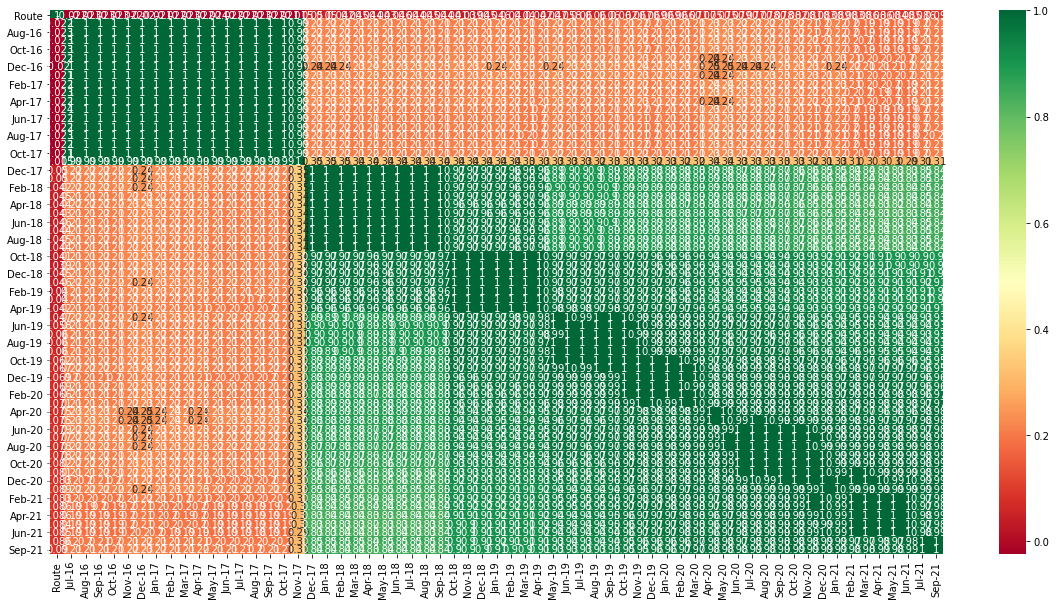

In [155]:
# future modification / relationship
corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g=sns.heatmap(X_train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [156]:
# creating RFE object
lr_model=LogisticRegression()
rfe= RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

ValueError: could not convert string to float: 'Child/Youth'

In [102]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.26


In [103]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 59.000
Column: 1, Selected False, Rank: 60.000
Column: 2, Selected False, Rank: 52.000
Column: 3, Selected False, Rank: 24.000
Column: 4, Selected False, Rank: 32.000
Column: 5, Selected False, Rank: 36.000
Column: 6, Selected False, Rank: 28.000
Column: 7, Selected False, Rank: 37.000
Column: 8, Selected False, Rank: 45.000
Column: 9, Selected False, Rank: 49.000
Column: 10, Selected False, Rank: 3.000
Column: 11, Selected False, Rank: 43.000
Column: 12, Selected False, Rank: 7.000
Column: 13, Selected False, Rank: 21.000
Column: 14, Selected False, Rank: 9.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected False, Rank: 18.000
Column: 17, Selected False, Rank: 13.000
Column: 18, Selected False, Rank: 41.000
Column: 19, Selected False, Rank: 25.000
Column: 20, Selected False, Rank: 15.000
Column: 21, Selected False, Rank: 54.000
Column: 22, Selected False, Rank: 11.000
Column: 23, Selected False, Rank: 30.000
Column: 24, Selected False, Ran

In [ ]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,64):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.32
Acc on test set using 2 features:  0.26
Acc on test set using 3 features:  0.24
Acc on test set using 4 features:  0.26
Acc on test set using 5 features:  0.26
Acc on test set using 6 features:  0.26
Acc on test set using 7 features:  0.26
Acc on test set using 8 features:  0.3
Acc on test set using 9 features:  0.3
Acc on test set using 10 features:  0.24
Acc on test set using 11 features:  0.24
Acc on test set using 12 features:  0.24


In [ ]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 64):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 64), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

# some useful functions # notes only

In [ ]:
# use to drop columns
#data.drop('1/07/2016+C1:BA1', inplace=True, axis=1)

In [ ]:
#use to rename colums
#data = data.rename(columns={"1/07/2016+C1:BA1": "Jul-16"})

# dont worry about this for now/ it works / i will make it simple later 
remove(data['Jul-16'])
remove(data['Aug-16'])
remove(data['Sep-16'])
remove(data['Oct-16'])
remove(data['Nov-16'])
remove(data['Dec-16'])

remove(data['Jan-17'])
remove(data['Feb-17'])
remove(data['Mar-17'])
remove(data['Apr-17'])
remove(data['May-17'])
remove(data['Jun-17'])
remove(data['Jul-17'])
remove(data['Aug-17'])
remove(data['Sep-17'])
remove(data['Oct-17'])
remove(data['Nov-17'])
remove(data['Dec-17'])

remove(data['Jan-18'])
remove(data['Feb-18'])
remove(data['Mar-18'])
remove(data['Apr-18'])
remove(data['May-18'])
remove(data['Jun-18'])
remove(data['Jul-18'])
remove(data['Aug-18'])
remove(data['Sep-18'])
remove(data['Oct-18'])
remove(data['Nov-18'])
remove(data['Dec-18'])

remove(data['Jan-19'])
remove(data['Feb-19'])
remove(data['Mar-19'])
remove(data['Apr-19'])
remove(data['May-19'])
remove(data['Jun-19'])
remove(data['Jul-19'])
remove(data['Aug-19'])
remove(data['Sep-19'])
remove(data['Oct-19'])
remove(data['Nov-19'])
remove(data['Dec-19'])

remove(data['Jan-20'])
remove(data['Feb-20'])
remove(data['Mar-20'])
remove(data['Apr-20'])
remove(data['May-20'])
remove(data['Jun-20'])
remove(data['Jul-20'])
remove(data['Aug-20'])
remove(data['Sep-20'])
remove(data['Oct-20'])
remove(data['Nov-20'])
remove(data['Dec-20'])

remove(data['Jan-21'])
remove(data['Feb-21'])
remove(data['Mar-21'])
remove(data['Apr-21'])
remove(data['May-21'])
remove(data['Jun-21'])
remove(data['Jul-21'])
remove(data['Aug-21'])
remove(data['Sep-21'])

In [ ]:
#data['Aug-16']= data['Aug-16'].astype(int)